In [1]:
###############################
## This script presents a statistical comparison of the flood frequency and inundation duration
## in the Prek Area and Zone 2C on a decadal and pre/post 2008 basis 
## exported from this script: https://code.earthengine.google.com/f69af6afbec2c0a5d43a173a965c67be

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from matplotlib.dates import date2num
from pandas import DataFrame
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
from scipy.stats import mstats
import plotly.express as px

In [2]:
#############################################################################################################################################################################################################################
## For the Complex Zone 2C Relationship
############################################################################################################################################################################################################################

# import necessary CSV files
freq_Z2C_90s = pd.read_csv('flood_link_GEE_2C_90s').set_index('wl_KK')
freq_Z2C_90s = freq_Z2C_90s.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])
freq_Z2C_10s = pd.read_csv('flood_link_GEE_2C_10s').set_index('wl_KK')
freq_Z2C_10s = freq_Z2C_10s.drop(columns=['Unnamed: 0',  'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


freq_Z2C_pre08 = pd.read_csv('flood_link_GEE_2C_pre08').set_index('wl_KK')
freq_Z2C_pre08 = freq_Z2C_pre08.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


freq_Z2C_post08 = pd.read_csv('flood_link_GEE_2C_post08').set_index('wl_KK')
freq_Z2C_post08 = freq_Z2C_post08.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


# create day-specific change metrics: 

#### for the decadal comparison: 
comp_Z2C_dec = freq_Z2C_10s.sub(freq_Z2C_90s.squeeze())

#### for the pre- and post-08 comparison: 
comp_Z2C_08 = freq_Z2C_post08.sub(freq_Z2C_pre08.squeeze())

In [25]:
#### make boxplots: 


df = comp_Z2C_dec.drop(columns=['Minimum', 'Maximum', 'freq_Dec1', 'freq_Dec15', 'freq_Jan1'])

fig = px.box(df.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

Text(0.5, 1.0, 'Change in inundation frequency 1990s-2010s')

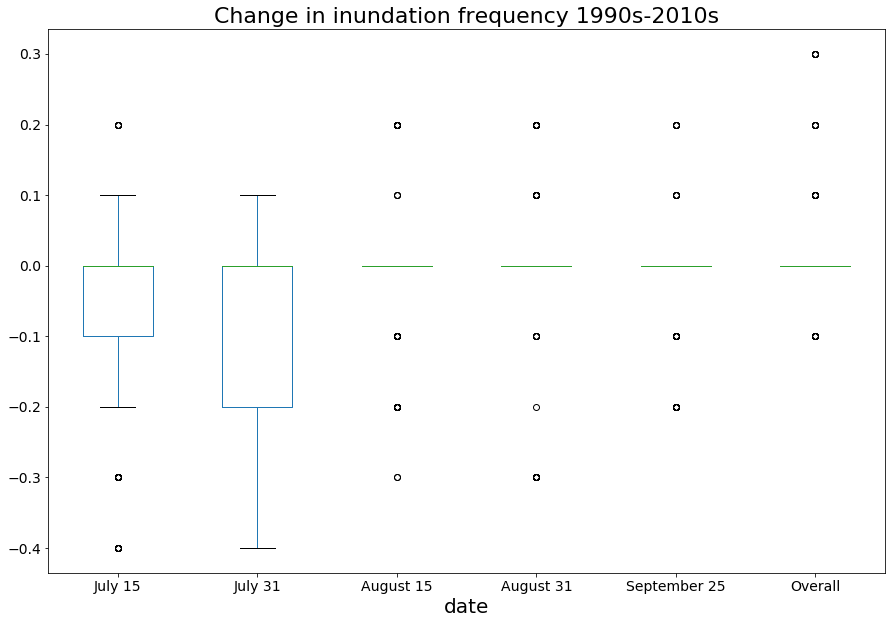

In [3]:
df = comp_Z2C_dec.drop(columns=['Minimum', 'Maximum', 'freq_Dec1', 'freq_Dec15', 'freq_Jan1'])

df.columns = ['August 15', 'August 31', 'July 15', 'July 31', 'September 25', 'Overall']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Zone 2C: Change in inundation frequency 1990s-2010s", fontsize = 22)


Text(0.5, 1.0, 'Change in inundation frequency pre- and post-2008')

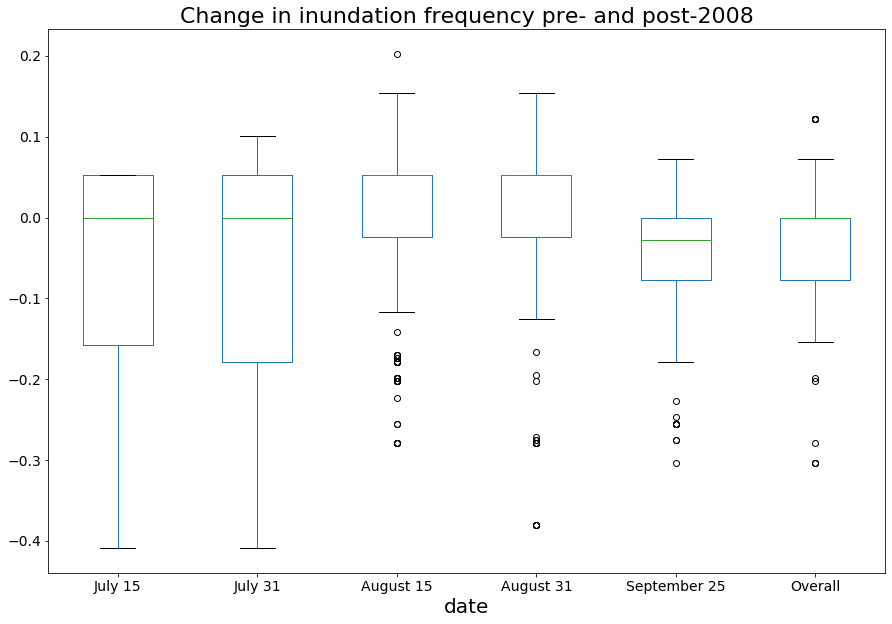

In [4]:
df = comp_Z2C_08.drop(columns=['Minimum', 'Maximum'])

df.columns = ['Overall','July 15', 'July 31', 'August 15', 'August 31', 'September 25']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Zone 2C: Change in inundation frequency pre- and post-2008", fontsize = 22)




In [5]:
#############################################################################################################################################################################################################################
## For the Complex Prek Area Relationship
############################################################################################################################################################################################################################

# import necessary CSV files
freq_PA_90s = pd.read_csv('flood_link_GEE_2C_90s').set_index('wl_KK')
freq_PA_90s = freq_PA_90s.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])
freq_PA_10s = pd.read_csv('flood_link_GEE_2C_10s').set_index('wl_KK')
freq_PA_10s = freq_PA_10s.drop(columns=['Unnamed: 0',  'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


freq_PA_pre08 = pd.read_csv('flood_link_GEE_2C_pre08').set_index('wl_KK')
freq_PA_pre08 = freq_PA_pre08.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


freq_PA_post08 = pd.read_csv('flood_link_GEE_2C_post08').set_index('wl_KK')
freq_PA_post08 = freq_PA_post08.drop(columns=['Unnamed: 0', 'date', 'Sentinel_date_2C', 'image_date', 'year', 'count_reached'])


# create day-specific change metrics: 

#### for the decadal comparison: 
comp_PA_dec = freq_PA_10s.sub(freq_PA_90s.squeeze())

#### for the pre- and post-08 comparison: 
comp_PA_08 = freq_PA_post08.sub(freq_PA_pre08.squeeze())

Text(0.5, 1.0, 'Prek Area: Change in inundation frequency 1990s-2010s')

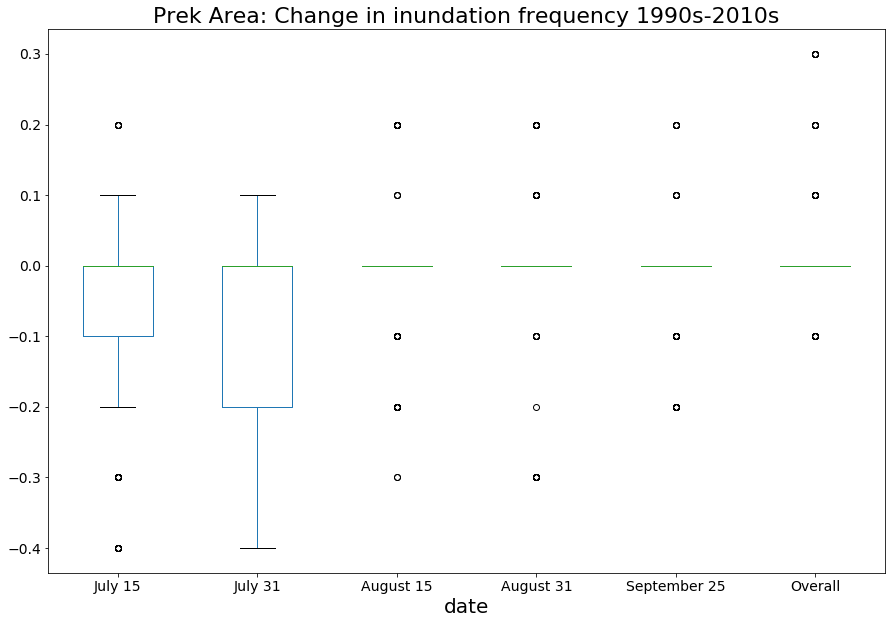

In [8]:
df = comp_PA_dec.drop(columns=['Minimum', 'Maximum', 'freq_Dec1', 'freq_Dec15', 'freq_Jan1'])

df.columns = ['August 15', 'August 31', 'July 15', 'July 31', 'September 25', 'Overall']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Prek Area: Change in inundation frequency 1990s-2010s", fontsize = 22)

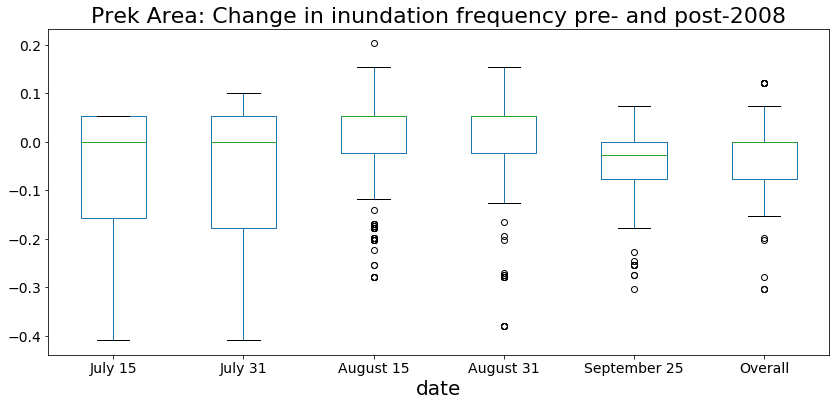

In [17]:
df = comp_PA_08.drop(columns=['Minimum', 'Maximum'])

df.columns = ['Overall','July 15', 'July 31', 'August 15', 'August 31', 'September 25']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

fig, ax = plt.subplots(1, figsize=(14, 6))

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Prek Area: Change in inundation frequency pre- and post-2008", fontsize = 22)

fig.savefig('Change_IF_PA_08', dpi=100)

Text(0.5, 1.0, 'Prek Area: Change in inundation frequency for WL above 5m 1990s-2010s')

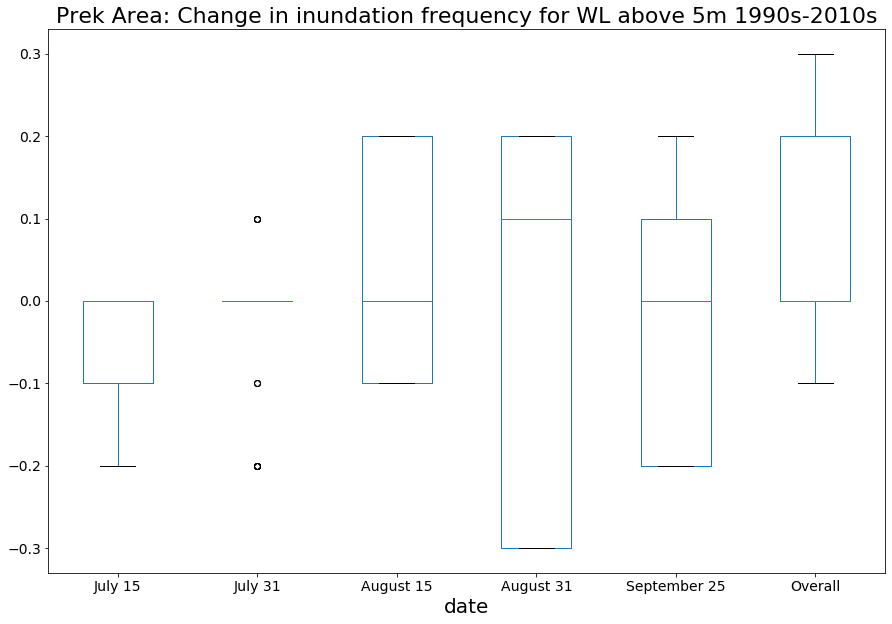

In [14]:
#############################################################################################################################################################################################################################
## WL above 5 m: 
############################################################################################################################################################################################################################

df = comp_PA_dec
df['wl_KK'] = df.index
df = df[(df['wl_KK']>5)]

df = df.set_index('wl_KK')

df = df.drop(columns=['Minimum', 'Maximum', 'freq_Dec1', 'freq_Dec15', 'freq_Jan1'])

df.columns = ['August 15', 'August 31', 'July 15', 'July 31', 'September 25', 'Overall']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Prek Area: Change in inundation frequency for WL above 5m 1990s-2010s", fontsize = 22)



Text(0.5, 1.0, 'Zone 2C: Change in inundation frequency for WL above 5m 1990s-2010s')

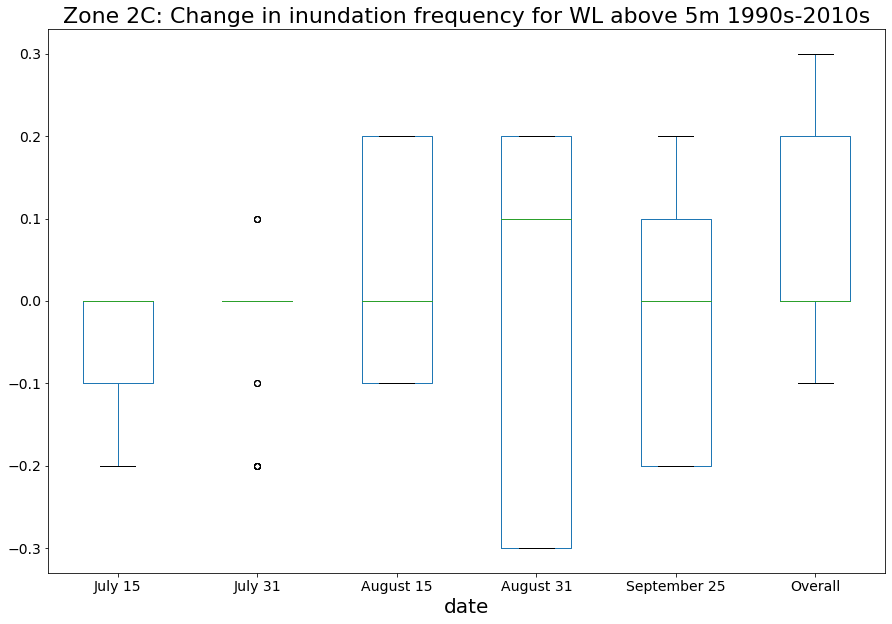

In [15]:
df = comp_Z2C_dec
df['wl_KK'] = df.index
df = df[(df['wl_KK']>5)]

df = df.set_index('wl_KK')

df = df.drop(columns=['Minimum', 'Maximum', 'freq_Dec1', 'freq_Dec15', 'freq_Jan1'])

df.columns = ['August 15', 'August 31', 'July 15', 'July 31', 'September 25', 'Overall']

columns = ['July 15', 'July 31', 'August 15', 'August 31', 'September 25', 'Overall']

ax = df.boxplot(column = columns,
                  grid = False, 
                  figsize = (15,10),
                  fontsize = 14)

ax.set_xlabel("date", fontsize = 20)
ax.set_ylabel("", fontsize = 20)
ax.set_title("Zone 2C: Change in inundation frequency for WL above 5m 1990s-2010s", fontsize = 22)
